In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load your data

df = pd.read_csv('TSLA.csv')

# Select the features and normalize them
features = df[['High', 'Low', 'Open', 'Close']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [3]:
# Prepare the data for training
# Adjust this part to match the structure of your data
def create_dataset(X, time_steps=1):
    Xs = []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].to_numpy()
        Xs.append(v)        
    return np.array(Xs)

time_steps = 100
X = create_dataset(features, time_steps)
y = df['Close'].shift(-time_steps).dropna().values

In [4]:
# Devide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape data for the CNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [5]:
# Buld the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 651.7705 - val_loss: 11481.5947
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 133.4122 - val_loss: 1070.0387
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.6317 - val_loss: 737.1657
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.2980 - val_loss: 664.7640
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.3130 - val_loss: 562.5415
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.0604 - val_loss: 521.5082
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.0261 - val_loss: 1033.8698
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.9108 - val_loss: 487.7368
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.9056 - val_loss: 780.9700
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.9880 - val_loss: 548.1958
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.1461 - val_loss: 4779.9834
Epoch 12/100
84/84 ━━━━

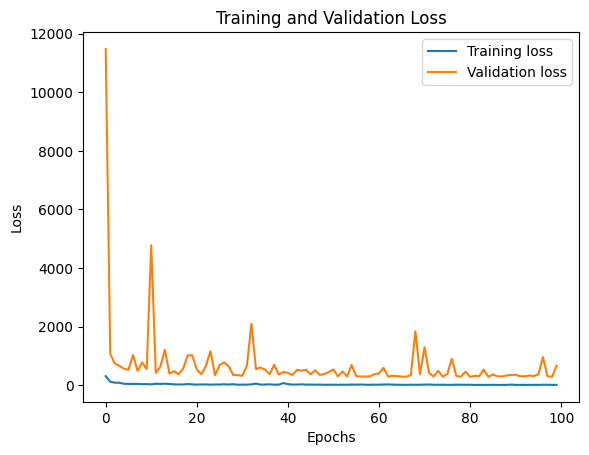

In [6]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step


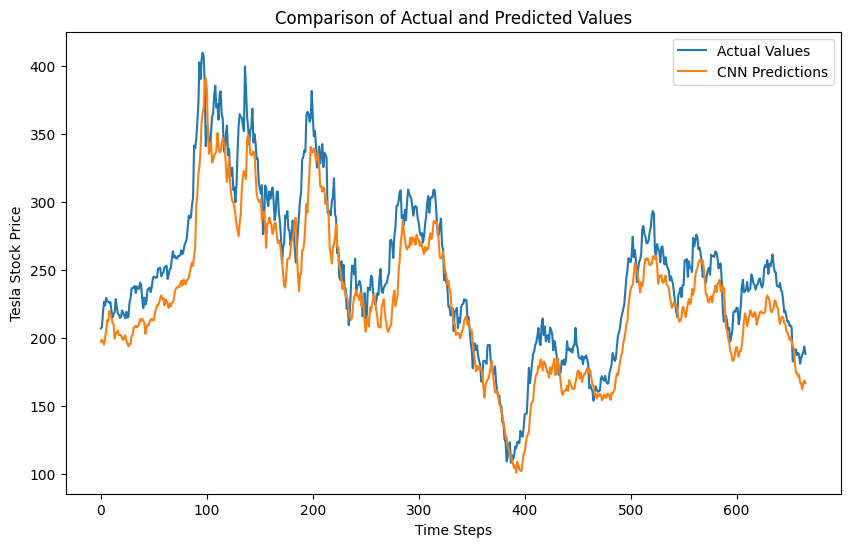

In [8]:
y_pred = model.predict(X_test)

y_test_trimmed = y_test[:len(y_pred)]

predictions_df = pd.DataFrame({'Actual': y_test_trimmed.flatten(), 'Predicted': y_pred.flatten()})

plt.figure(figsize=(10,6))
plt.plot(predictions_df['Actual'], label='Actual Values')
plt.plot(predictions_df['Predicted'], label='CNN Predictions')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()
